# 3. Data Preparation

In this phase we will prepare the dataset, modifying it according to the previous phase. In the end of this notebook we should have a dataset ready to be used in modelling.

## 3.1 Select Data

We begin by loading the complete raw data so that we have more flexibility in the preparation of the data.

The selection of the most relevant variables will be done in the next steps.

In [1]:
import pandas as pd

student = pd.read_csv("../../../databases/2018/student2018.csv")
teacher = pd.read_csv("../../../databases/2018/only_teacher2018.csv")

#student = pd.read_csv("../../../databases/2018/student2018.csv", nrows=2000)
#teacher = pd.read_csv("../../../databases/2018/only_teacher2018.csv", nrows=2000)

print("student shape:", student.shape)
print("teacher shape:", teacher.shape)


student shape: (612004, 1119)
teacher shape: (107367, 350)


## 3.2 Clean Data

From the previous phase, we decided to remove unnecessary variables according the following criteria:

#### Students data
- Remove countries not in teacher dataset

- We've metion in section 2 that we should remove this columns from student dataset: `"CNT", "NatCen", "PROGN", "STRATUM","SUBNATION", "COBN_S", "COBN_M", "COBN_F", "OCOD1", "OCOD2", "OCOD3", "VER_DAT","CYC", "W_FSTUWT","W_FSTURWT{i}","i", "SENWT", "WVARSTRR", "UNIT","BOOKID", "LANGTEST_QQQ", "LANGTEST_COG" "LANGTEST_PAQ", "ADMINMODE"`
- Variables with more than 80% missing values.

#### Teacher data

- We've metion in section 2 that we should remove this columns from student dataset: `"NatCen", "PROGN", "STRATUM", "SUBNATION", "COBN_T", "VER_DAT", "CYC", "W_SCHGRNRABWT", "W_FSTUWT_SCH_SUM", "LANGTEST", "ADMINMODE"`
- Variables with more than 80% missing values.

In [2]:
print("Shape before", student.shape)

w_fsturwt_columns = [f"W_FSTURWT{i}" for i in range(1, 81)]

# Lista de colunas a remover
columns_to_drop = [
    "NatCen", "PROGN", "STRATUM", "SUBNATION", "COBN_S", "COBN_M", "COBN_F",
    "OCOD1", "OCOD2", "OCOD3", "VER_DAT", "CYC", "W_FSTUWT", "i",
    "SENWT", "WVARSTRR", "UNIT", "BOOKID", "LANGTEST_QQQ", "LANGTEST_COG",
    "LANGTEST_PAQ", "ADMINMODE"
] + w_fsturwt_columns

# Remover as colunas do DataFrame
student = student.drop(columns=columns_to_drop, errors='ignore')

missing = student.isnull().mean().sort_values(ascending=False)
student = student.drop(columns=missing[missing > 0.8].index)

# we wont need the sutudents data

columns_to_keep = [
'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ',
'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE',
'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH',
'CNT', 'CNTSCHID', 'REPEAT', 'ST001D01T', 'CNTSTUID'
]

student = student[columns_to_keep]
student.head(5)
print("Shape after", student.shape)

Shape before (612004, 1119)
Shape after (612004, 35)


#### Teachers data

In [3]:
# Lista de colunas a remover
columns_to_drop = [
    "NatCen", "PROGN", "STRATUM", "SUBNATION", "COBN_T", "VER_DAT",
    "CYC", "W_SCHGRNRABWT", "W_FSTUWT_SCH_SUM", "LANGTEST", "ADMINMODE"
]

# Remover as colunas do DataFrame
teacher = teacher.drop(columns=columns_to_drop, errors='ignore')

missing = teacher.isnull().mean().sort_values(ascending=False)
teacher = teacher.drop(columns=missing[missing > 0.8].index)

teacher.head(5)
print("Shape after", teacher.shape)

del missing


Shape after (107367, 341)


In [4]:
print("Before student shape: (612004, 1119)")
print("Before teacher shape: (107367, 350)")

print("student shape:", student.shape)
print("teacher shape:", teacher.shape)

Before student shape: (612004, 1119)
Before teacher shape: (107367, 350)
student shape: (612004, 35)
teacher shape: (107367, 341)


## 3.3 Construct Data

In this step, we construct new variables based on the available data.

For each subject, there are 10 plausible values (PVs), which we averaged into a single score column per subject.

In [5]:
from columns_list_q2 import (
    get_avg_results,
    drop_columns,
    math_columns,
    reading_columns,
    science_columns
)

student = get_avg_results(student, reading_columns, "Reading", None)
student = get_avg_results(student, math_columns, "Math", None)
student = get_avg_results(student, science_columns, "Science", None)

student = drop_columns(student)

del math_columns
del reading_columns
del science_columns

In [6]:
student.head(5)

,CNT,CNTSCHID,REPEAT,ST001D01T,CNTSTUID,Avg Reading Result,Avg Math Result,Avg Science Result
0,b'ALB',800115.0,0.0,10.0,800001.0,360.9820,460.4839,378.8231
1,b'ALB',800300.0,0.0,10.0,800002.0,334.3425,342.9813,323.4757
2,b'ALB',800088.0,0.0,9.0,800003.0,277.4818,350.4633,333.2035
3,b'ALB',800014.0,NaN,10.0,800004.0,339.2181,329.1474,354.7029
4,b'ALB',800294.0,0.0,10.0,800005.0,469.8993,389.0078,450.5653


In [7]:
print("student shape:", student.shape)
print("teacher shape:", teacher.shape)

student shape: (612004, 8)
teacher shape: (107367, 341)


## 3.4 Integrate Data

First save data, to keep memory clean

In [8]:
teacher.to_csv("../../../databases/2018/cleaned_teacher2018.csv", mode="w", index=False)
student.to_csv("../../../databases/2018/cleaned_students2018.csv", mode="w", index=False)

del teacher
del student

#### Join tables

In [9]:
"""
import pandas as pd

# Function to load and merge datasets in chunks
def init_target_csv():
    with open("../../../databases/2018/cleaned_teacher_student2018.csv", 'w') as file:
        pass # Do nothing, just open and close the file

    df1 = pd.read_csv('../../../databases/2018/cleaned_students2018.csv', nrows=10)
    df2 = pd.read_csv('../../../databases/2018/cleaned_teacher2018.csv', nrows=10)

    df_result = pd.DataFrame(columns=(df1.columns.append(df2.columns)).unique())
    df_result.to_csv("../../../databases/2018/cleaned_teacher_student2018.csv", index_label=False)

# Function to load and merge datasets in chunks
def get_dataset_in_chunks(chunk_size):
    chunks = []
    i=0
    #teacher = pd.read_csv('../../../databases/2018/cleaned_teacher2018.csv')
    #countries = teacher['CNT'].unique()
    countries = ["b'PRT'", "b'ESP'"]
    #del teacher

    for chunk in pd.read_csv('../../../databases/2018/cleaned_students2018.csv', chunksize=chunk_size):
        i=i+1
        print("i=",i,flush=True)
        #chunk = chunk[columns_to_keep]
        chunk = chunk[chunk['CNT'].isin(countries)]

        merged_chunk = pd.merge(pd.read_csv('../../../databases/2018/cleaned_teacher2018.csv'), chunk, on=['CNT', 'CNTSCHID'], how="outer")
        merged_chunk.to_csv("../../../databases/2018/cleaned_teacher_student2018.csv", mode="a", header=False, index=False)

# Define the chunk size
chunk_size = 50000 # Adjust the chunk size based on your memory capacity

init_target_csv()
# Perform the merge in chunks
get_dataset_in_chunks(chunk_size)

print("Merge completed and saved to 'cleaned_teacher_student2018.csv'.")
"""


'\nimport pandas as pd\n\n# Function to load and merge datasets in chunks\ndef init_target_csv():\n    with open("../../../databases/2018/cleaned_teacher_student2018.csv", \'w\') as file:\n        pass # Do nothing, just open and close the file\n\n    df1 = pd.read_csv(\'../../../databases/2018/cleaned_students2018.csv\', nrows=10)\n    df2 = pd.read_csv(\'../../../databases/2018/cleaned_teacher2018.csv\', nrows=10)\n\n    df_result = pd.DataFrame(columns=(df1.columns.append(df2.columns)).unique())\n    df_result.to_csv("../../../databases/2018/cleaned_teacher_student2018.csv", index_label=False)\n\n# Function to load and merge datasets in chunks\ndef get_dataset_in_chunks(chunk_size):\n    chunks = []\n    i=0\n    #teacher = pd.read_csv(\'../../../databases/2018/cleaned_teacher2018.csv\')\n    #countries = teacher[\'CNT\'].unique()\n    countries = ["b\'PRT\'", "b\'ESP\'"]\n    #del teacher\n\n    for chunk in pd.read_csv(\'../../../databases/2018/cleaned_students2018.csv\', chunksiz

In [10]:
import pandas as pd

teacher = pd.read_csv('../../../databases/2018/cleaned_teacher2018.csv')
print(teacher.shape)
output_path = '../../../databases/2018/cleaned_teacher_student2018.csv'
teacher = pd.merge(teacher, pd.read_csv('../../../databases/2018/cleaned_students2018.csv'), on=['CNT', 'CNTSCHID'], how='inner')
teacher.to_csv(output_path, mode='w', index=False)
print(teacher.shape)

"""
import pandas as pd

columns_to_keep = [
'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV6READ', 'PV7READ', 'PV8READ', 'PV9READ', 'PV10READ',
'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'PV6SCIE', 'PV7SCIE', 'PV8SCIE', 'PV9SCIE', 'PV10SCIE',
'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV6MATH', 'PV7MATH', 'PV8MATH', 'PV9MATH', 'PV10MATH',
'CNT', 'CNTSCHID', 'REPEAT', 'ST001D01T', 'CNTSTUID'
]

import pandas as pd

teacher_df = pd.read_csv('../../../databases/2018/cleaned_teacher2018.csv')
chunk_size = 50000 # Adjust based on your memory
output_path = '../../../databases/2018/cleaned_teacher_student2018_pt.csv'

i = 0
first_chunk = True


with open(output_path, 'w'):


for chunk in pd.read_csv('../../../databases/2018/cleaned_students2018.csv', chunksize=chunk_size):
    i += 1
    print(f"Processing chunk {i}", flush=True)
    # Optional: filter by countries
    chunk = chunk[chunk['CNT'].isin(countries)]
    # Outer join on CNT and CNTSCHID
    merged_chunk = pd.merge(teacher_df, chunk, on=['CNT', 'CNTSCHID'], how='outer')
    # Append to output file
    merged_chunk.to_csv(output_path, mode='a', header=first_chunk, index=False)
    first_chunk = False

"""

del teacher

(107367, 341)
(3456667, 347)


In [11]:
import pandas as pd
group_by_teacher = pd.read_csv('../../../databases/2018/cleaned_teacher_student2018.csv')
print(group_by_teacher.shape)

(3456667, 347)


In [12]:
def group_and_integrate_by_teacher(df, teacher_id_col='CNTTCHID'):
    student_aggs = {
        'CNTSTUID': 'nunique',
        'REPEAT': 'sum',
        'Avg Reading Result': 'mean',
        'Avg Math Result': 'mean',
        'Avg Science Result': 'mean'
    }

    agg_dict = {col: func for col, func in student_aggs.items() if col in df.columns}
    candidate_cols = [col for col in df.columns if col not in agg_dict and col != teacher_id_col]
    uniqueness_check = df.groupby(teacher_id_col)[candidate_cols].nunique()

    teacher_cols_found = 0
    for col in candidate_cols:
        if uniqueness_check[col].max(skipna=True) <= 1:
            agg_dict[col] = 'first' # If constant, just keep the first value.
            teacher_cols_found += 1

    integrated_df = df.groupby(teacher_id_col).agg(agg_dict).reset_index()

    # 4. Rename the aggregated columns for clarity.
    integrated_df = integrated_df.rename(columns={
        'CNTSTUID': 'total_students',
        'REPEAT': 'total_repeaters',
#        'Avg Reading Result': 'class_avg_reading',
#        'Avg Math Result': 'class_avg_math',
#        'Avg Science Result': 'class_avg_science'
    })

    print("Integration complete.")
    return integrated_df

group_by_teacher = group_and_integrate_by_teacher(group_by_teacher)

group_by_teacher.to_csv("../../../databases/2018/integrated_teacher2018.csv", mode="w", index=False)

"""
def group_teacher(group_by_teacher):
    # Supondo que você já tenha um DataFrame chamado teacher_student
    # Agrupar por professor (CNTTCHID)
    summary = group_by_teacher.groupby('CNTTCHID').agg(
       total_students=('CNTSTUID', 'nunique'), # número de alunos únicos por professor
       repeating_students=('REPEAT', 'sum')    # total de alunos repetentes por professor
    )
    # Calcular a média de todas as colunas numéricas dos alunos por professor
    student_means = group_by_teacher.groupby('CNTTCHID').mean(numeric_only=True)
    # Combinar os dois DataFrames
    teacher_summary = pd.concat([summary, student_means], axis=1).reset_index()

    return teacher_summary

group_by_teacher = group_teacher(group_by_teacher)

# Exibir o resultado
print(group_by_teacher.head())
print(group_by_teacher.shape)
# Display the result

group_by_teacher.to_csv("../../../databases/2018/integrated_teacher2018.csv", mode="w", index=False)
"""

Integration complete.


'\ndef group_teacher(group_by_teacher):\n    # Supondo que você já tenha um DataFrame chamado teacher_student\n    # Agrupar por professor (CNTTCHID)\n    summary = group_by_teacher.groupby(\'CNTTCHID\').agg(\n       total_students=(\'CNTSTUID\', \'nunique\'), # número de alunos únicos por professor\n       repeating_students=(\'REPEAT\', \'sum\')    # total de alunos repetentes por professor\n    )\n    # Calcular a média de todas as colunas numéricas dos alunos por professor\n    student_means = group_by_teacher.groupby(\'CNTTCHID\').mean(numeric_only=True)\n    # Combinar os dois DataFrames\n    teacher_summary = pd.concat([summary, student_means], axis=1).reset_index()\n\n    return teacher_summary\n\ngroup_by_teacher = group_teacher(group_by_teacher)\n\n# Exibir o resultado\nprint(group_by_teacher.head())\nprint(group_by_teacher.shape)\n# Display the result\n\ngroup_by_teacher.to_csv("../../../databases/2018/integrated_teacher2018.csv", mode="w", index=False)\n'

In [13]:
"""
import pandas as pd
from collections import defaultdict

# Define file path and chunk size
file_path = '../../../databases/2018/cleaned_teacher_student2018.csv' # Replace with your actual file path
chunk_size = 10000

# Step 1: Collect all unique teacher IDs
teacher_ids = set()
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    teacher_ids.update(chunk['CNTTCHID'].unique())

print(teacher_ids)

# Convert to list and split into batches
teacher_ids = list(teacher_ids)
batch_size = 100
batches = [teacher_ids[i:i + batch_size] for i in range(0, len(teacher_ids), batch_size)]

# Initialize dictionaries for aggregation
sum_dict = defaultdict(lambda: defaultdict(float))
count_dict = defaultdict(lambda: defaultdict(int))
unique_students = defaultdict(set)
repeating_students = defaultdict(int)

print("batches:",  len(batches) ,flush=True)
# Step 2: Process each batch

for idx, batch in enumerate(batches):
    print("batches:",  idx, "/" ,len(batches) ,flush=True)
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        filtered = chunk[chunk['CNTTCHID'].isin(batch)]
        for teacher_id, group in filtered.groupby('CNTTCHID'):
            numeric_cols = group.select_dtypes(include='number').columns
            for col in numeric_cols:
                sum_dict[teacher_id][col] += group[col].sum()
                count_dict[teacher_id][col] += group[col].count()
                unique_students[teacher_id].update(group['CNTSTUID'].unique())
                repeating_students[teacher_id] += group['REPEAT'].sum()

# Step 3: Compile final results
results = []
for teacher_id in sum_dict:
    row = {'CNTTCHID': teacher_id}
    row['total_students'] = len(unique_students[teacher_id])
    row['repeating_students'] = repeating_students[teacher_id]
    for col in sum_dict[teacher_id]:
        if count_dict[teacher_id][col] > 0:
            row[f'{col}'] = sum_dict[teacher_id][col] / count_dict[teacher_id][col]
        else:
            row[f'{col}'] = float('nan') # or 0, or skip, depending on your needs

        results.append(row)

# Convert to DataFrame
group_by_teacher = pd.DataFrame(results)
print(group_by_teacher.head())

group_by_teacher.to_csv("../../../databases/2018/grouped_by_teacher2018.csv", index=False)

del group_by_teacher

"""


'\nimport pandas as pd\nfrom collections import defaultdict\n\n# Define file path and chunk size\nfile_path = \'../../../databases/2018/cleaned_teacher_student2018.csv\' # Replace with your actual file path\nchunk_size = 10000\n\n# Step 1: Collect all unique teacher IDs\nteacher_ids = set()\nfor chunk in pd.read_csv(file_path, chunksize=chunk_size):\n    teacher_ids.update(chunk[\'CNTTCHID\'].unique())\n\nprint(teacher_ids)\n\n# Convert to list and split into batches\nteacher_ids = list(teacher_ids)\nbatch_size = 100\nbatches = [teacher_ids[i:i + batch_size] for i in range(0, len(teacher_ids), batch_size)]\n\n# Initialize dictionaries for aggregation\nsum_dict = defaultdict(lambda: defaultdict(float))\ncount_dict = defaultdict(lambda: defaultdict(int))\nunique_students = defaultdict(set)\nrepeating_students = defaultdict(int)\n\nprint("batches:",  len(batches) ,flush=True)\n# Step 2: Process each batch\n\nfor idx, batch in enumerate(batches):\n    print("batches:",  idx, "/" ,len(batch

## 3.5 Format Data

Set Performance categories
- For data grouped by students
- For data grouped by teachers

In [14]:
def categorize_reading_students_by_performance(df):
    # Sort the DataFrame by 'Avg Reading Result' in descending order
    df = df.sort_values(by='Avg Reading Result', ascending=False).reset_index(drop=True)

    # Calculate the number of students
    total_students = len(df)

    # Define the percentage thresholds
    very_good_threshold = int(total_students * 0.70)
    neutral_threshold = int(total_students * 0.50)

    # Assign categories from highest to lowest
    df.loc[0:neutral_threshold-1, 'Reading Score Classification'] = 0
    df.loc[neutral_threshold:very_good_threshold-1, 'Reading Score Classification'] = 1
    df.loc[very_good_threshold:, 'Reading Score Classification'] = 2

    return df

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load new table
teacher = pd.read_csv('../../../databases/2018/integrated_teacher2018.csv')

In [16]:
teacher = categorize_reading_students_by_performance(teacher)
teacher.to_csv("../../../databases/2018/formated_by_teacher2018.csv", mode="w", index=False)

del teacher

## Correlation chart

Using a more cleaner dataset, we can check again the correlations between the dataset features and the target variable (average reading result).

In [17]:
import sys
import os
import pandas as pd

# Add the src directory to the Python path
sys.path.append(os.path.abspath('../../../src')) # Add the src directory to the Python path

from pisadatamap.pisadatamap import PISADataMap

data_map = PISADataMap([ '../../../databases/2018/teacher_data_structure_2018.csv'])
stu_data_map = PISADataMap(['../../../databases/2018/student_data_structure_2018.csv'])

In [18]:
teacher = pd.read_csv('../../../databases/2018/formated_by_teacher2018.csv')

In [19]:
tch_best_correlations = teacher[teacher["Reading Score Classification"]==2].corr(numeric_only=True)[
    "Avg Reading Result"
].sort_values(ascending=False)
tch_best_correlations = tch_best_correlations.drop("Avg Reading Result")

tch_worst_correlations = teacher[teacher["Reading Score Classification"]==0].corr(numeric_only=True)[
    "Avg Reading Result"
].sort_values(ascending=False)
tch_worst_correlations = tch_worst_correlations.drop("Avg Reading Result")

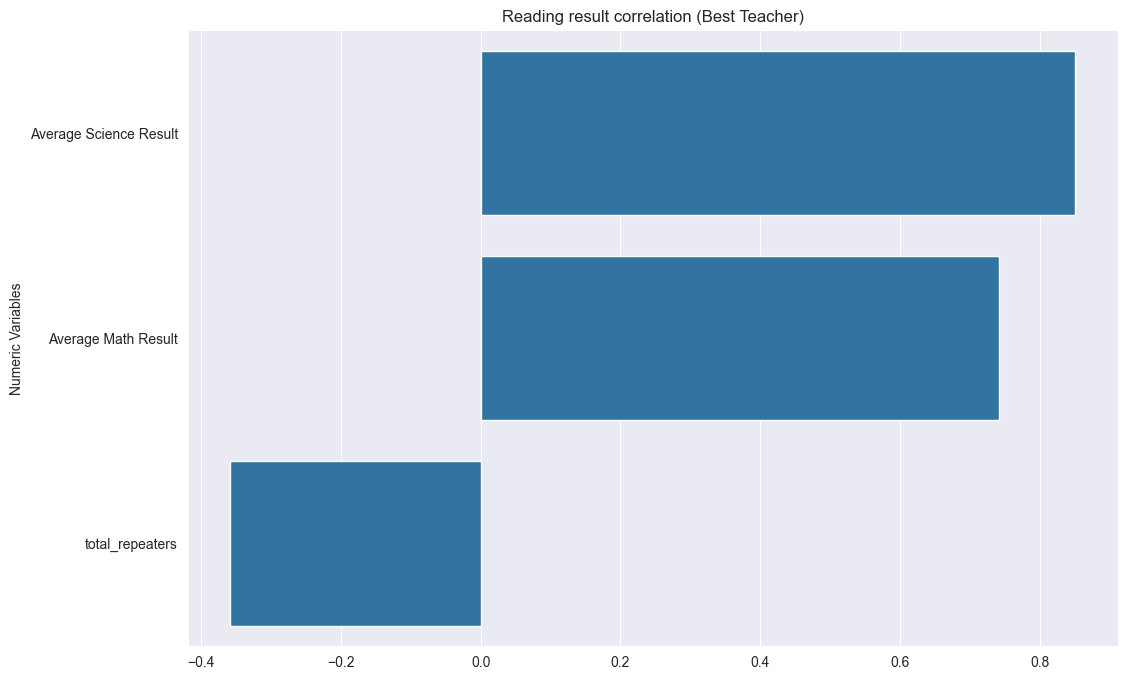

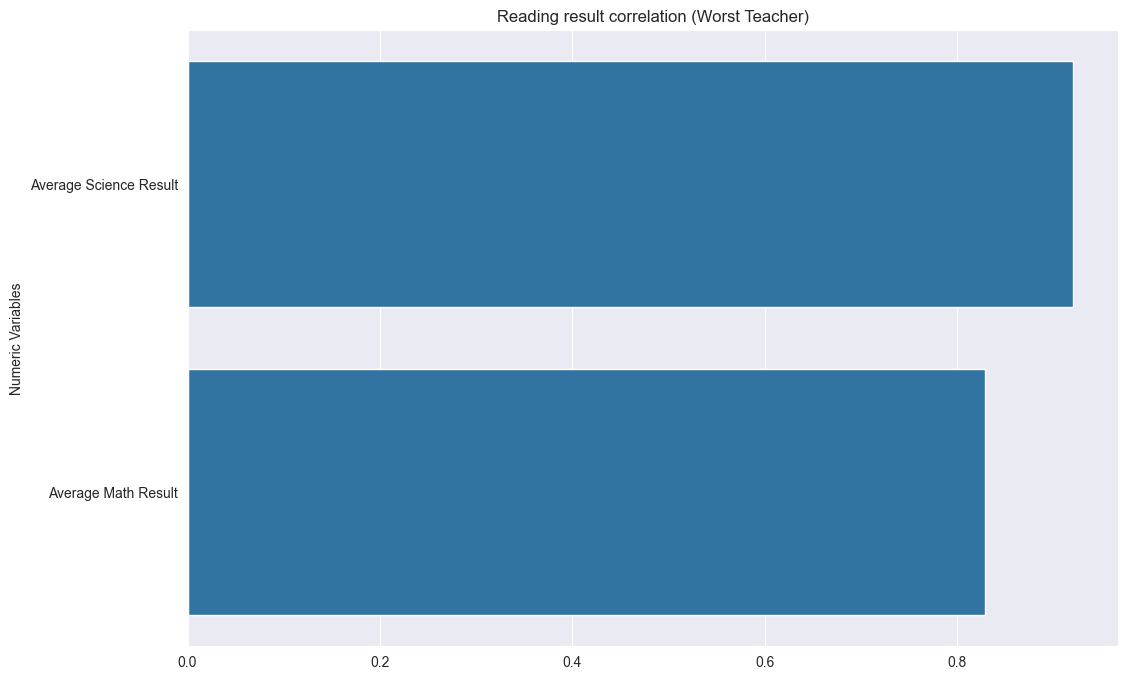

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

tch_best_correlations = tch_best_correlations[tch_best_correlations.abs() > 0.3]
tch_worst_correlations = tch_worst_correlations[
    tch_worst_correlations.abs() > 0.3
]

tch_best_correlations.index = [
    (data_map.get(col)) for col in tch_best_correlations.index
]
tch_worst_correlations.index = [
    (data_map.get(col)) for col in tch_worst_correlations.index
]

#tch_best_correlations.index = [f"{col}" for col in tch_best_correlations.index ]
#tch_worst_correlations.index = [f"{col}" for col in tch_worst_correlations.index ]

plt.figure(figsize=(12, 8))

sns.barplot(x=tch_best_correlations.values, y=tch_best_correlations.index)
plt.title("Reading result correlation (Best Teacher)")
plt.ylabel("Numeric Variables")
plt.show()

plt.figure(figsize=(12, 8))

sns.barplot(x=tch_worst_correlations.values, y=tch_worst_correlations.index)
plt.title("Reading result correlation (Worst Teacher)")
plt.ylabel("Numeric Variables")

plt.show()

<!-- Since the focus is on performance students, we prioritized features that show a strong correlation with this group. -->

Following the correlation analysis, we opted to incorporate variables identified as significant from both the repeating and non-repeating student groups. This mixed feature selection strategy aims to leverage complementary insights from both subsets, enhancing the robustness of the final dataset.

In [21]:
print(tch_best_correlations.head(20))
print(tch_worst_correlations.head(20))

Average Science Result    0.850455
Average Math Result       0.742049
total_repeaters          -0.358825
Name: Avg Reading Result, dtype: float64
Average Science Result    0.921051
Average Math Result       0.829439
Name: Avg Reading Result, dtype: float64


## 3.1 Select Data (Cont.)

After completing the data analysis, we merged the selected numerical and categorical variables to create the final dataset, ready for the next phase.

In [22]:
from collections import OrderedDict

data_map = PISADataMap([
    '../../../databases/2018/teacher_data_structure_2018.csv',
    '../../../databases/2018/student_data_structure_2018.csv',
])

#reversed_column_mapping = {v: k for k, v in data_map.map_enum.__members__.items()}

reversed_column_mapping = {v.value: k for k, v in data_map.map_enum.__members__.items()}

best_correl_teacher_columns = [
    reversed_column_mapping.get(col, col) for col in tch_best_correlations.index
]
worst_correl_teacher_columns = [
    reversed_column_mapping.get(col, col) for col in tch_worst_correlations.index
]

columns_to_include = list(
    OrderedDict.fromkeys(
        best_correl_teacher_columns
        + worst_correl_teacher_columns
        + ["Avg Reading Result"]
    )
)

teacher = pd.read_csv('../../../databases/2018/formated_by_teacher2018.csv')

teacher = teacher[columns_to_include]
teacher = teacher[sorted(teacher.columns)]
teacher

,Avg Math Result,Avg Reading Result,Avg Science Result,total_repeaters
0,730.823556,676.532267,673.172582,1.0
1,730.823556,676.532267,673.172582,1.0
2,730.823556,676.532267,673.172582,1.0
3,730.823556,676.532267,673.172582,1.0
4,730.823556,676.532267,673.172582,1.0
...,...,...,...,...
107362,186.300700,216.418500,249.022000,1.0
107363,201.561764,209.728000,214.816545,7.0
107364,201.561764,209.728000,214.816545,7.0
107365,258.340867,200.758600,205.117500,2.0


Finally, we analyzed the correlation matrix to check for highly correlated features that might be removed, but none were identified.

In [24]:
correlation_matrix = teacher.corr(numeric_only=True)

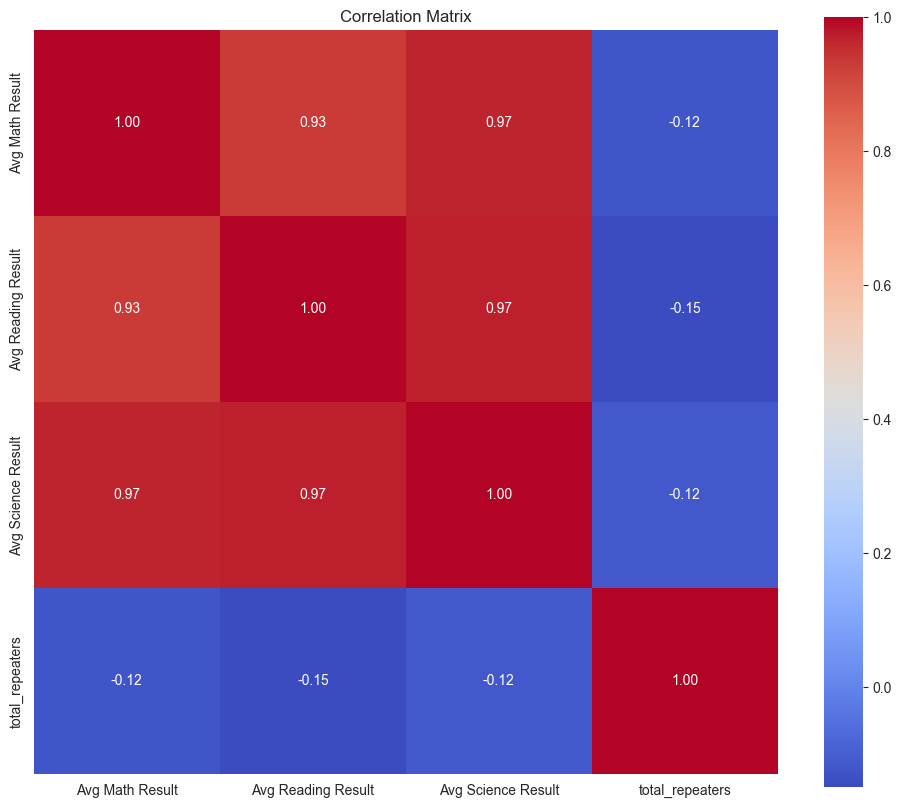

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [26]:
teacher.to_csv("../../../databases/q2_database_teacher.csv",  mode="w", index=False)

In [27]:
teacher = pd.read_csv("../../../databases/q2_database_teacher.csv")
print("teacher shape:", teacher.shape)

teacher shape: (107367, 4)


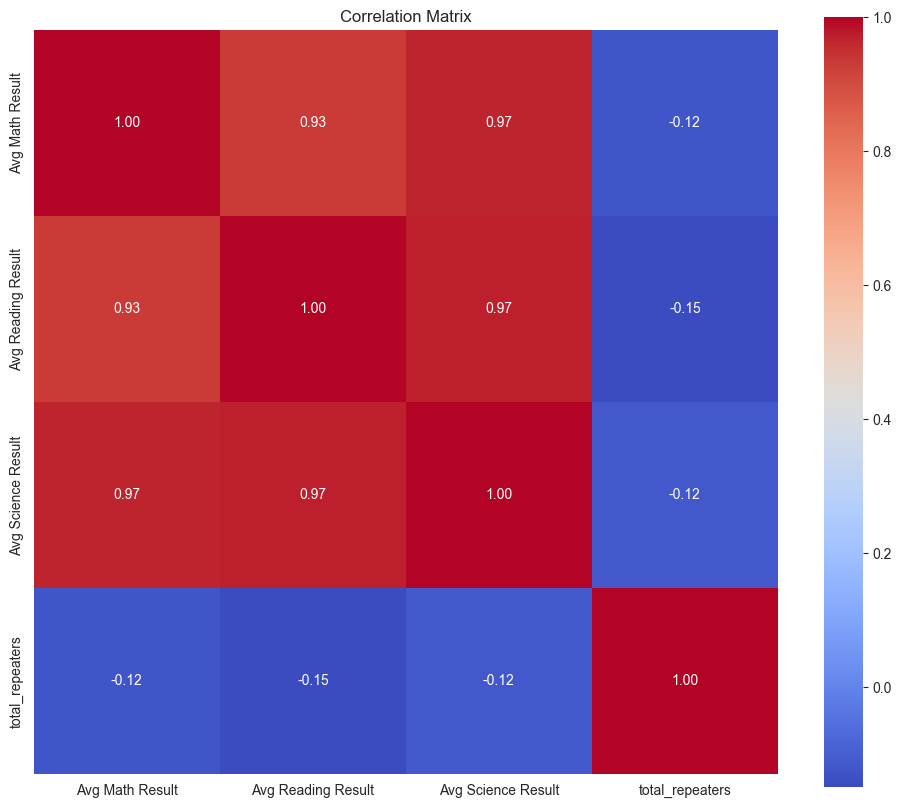

In [28]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

This correlations did not show much